In [158]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

In [159]:
# read every csv in originais directory
df_crimes = pd.read_csv('originais/crimes_freguesias_boundaries.csv', sep=';')
dicofres_available = df_crimes['Dicofre'].unique()

# Datasets a considerar excluir
df_civil = pd.read_csv('originais/estado_civil.csv', sep=';')
df_etario = pd.read_csv('originais/grupo_etario_reduzido.csv', sep=',')

# Datasets usados
df_socioeconomico = pd.read_csv('originais/grupo_socioeconomico.csv', sep=';')
df_housing = pd.read_csv('originais/housing_tenure.csv', sep=';')
df_escolaridade = pd.read_csv('originais/nivel_escolaridade.csv', sep=';')
df_desempregada = pd.read_csv('originais/populacao_desempregada.csv', sep=';')
df_residente = pd.read_csv('originais/populacao_residente.csv', sep=';')
df_renda = pd.read_csv('originais/valor_medio_rendas.csv', sep=';')

# Excluir dicofres que não estão em df_crimes
df_civil = df_civil[df_civil['Dicofre'].isin(dicofres_available)]
df_etario = df_etario[df_etario['Dicofre'].isin(dicofres_available)]
df_socioeconomico = df_socioeconomico[df_socioeconomico['Dicofre'].isin(dicofres_available)]
df_housing = df_housing[df_housing['Dicofre'].isin(dicofres_available)]
df_escolaridade = df_escolaridade[df_escolaridade['Dicofre'].isin(dicofres_available)]
df_desempregada = df_desempregada[df_desempregada['Dicofre'].isin(dicofres_available)]
df_residente = df_residente[df_residente['Dicofre'].isin(dicofres_available)]
df_renda = df_renda[df_renda['Dicofre'].isin(dicofres_available)]

In [160]:
df_civil

,Unnamed: 0,Total,Solteiro,Casado,Viúvo,Divorciado,Dicofre
25,110601: Ajuda,14306,7135,4473,1429,1269,110601.0
26,110602: Alcântara,13850,7218,4189,1091,1352,110602.0
27,110654: Alvalade,33309,17032,10229,2732,3316,110654.0
28,110655: Areeiro,21160,10605,6878,1566,2111,110655.0
29,110656: Arroios,33302,18795,9485,2084,2938,110656.0
30,110657: Avenidas Novas,23261,12011,7348,1618,2284,110657.0
31,110607: Beato,12183,6258,3739,1056,1130,110607.0
32,110658: Belém,16546,7747,5951,1246,1602,110658.0
33,110608: Benfica,35362,16931,11798,3170,3463,110608.0
34,110659: Campo de Ourique,22140,11461,6705,1788,2186,110659.0


## K-Means

In [172]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px

# Selecionar colunas relevantes
data = df_civil[['Viúvo', 'Casado', 'Divorciado']]

# Padronizar os dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Aplicar KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df_civil['cluster'] = kmeans.fit_predict(scaled_data)

# Juntar com df_crimes para obter os nomes
df_merged = df_civil.merge(df_crimes[['Dicofre', 'Freguesia']], on='Dicofre', how='left')

# Gráfico 3D interativo
fig = px.scatter_3d(
    df_merged,
    x='Viúvo',
    y='Casado',
    z='Divorciado',
    color='cluster',
    text='Freguesia',  # Nome que aparecerá ao passar o mouse
    title='Clustering 3D por Estado Civil com Freguesia',
    color_continuous_scale='Viridis'
)

fig.update_traces(marker=dict(size=5), selector=dict(mode='markers'))
fig.update_layout(
    scene=dict(
        xaxis_title='Viúvo',
        yaxis_title='Casado',
        zaxis_title='Divorciado'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [138]:
civil_only = df_features[['Casado', 'Solteiro', 'Divorciado', 'Viúvo']]

k = 4
kmeans_civil = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans_civil.fit(civil_only)

df_features['Cluster_Civil'] = kmeans_civil.labels_


In [ ]:
for c in sorted(df_features['Cluster_Civil'].unique()):
    print(f"\n🟦 Cluster {c}")
    print(df_features[df_features['Cluster_Civil'] == c][['Casado', 'Solteiro', 'Divorciado', 'Viúvo', 'Crimes']])



🟦 Cluster 0
          Casado  Solteiro  Divorciado  Viúvo  \
Dicofre                                         
110608.0   11798     16931        3463   3170   
110621.0   11475     18087        2925   2992   
110633.0   10773     15241        3034   3131   
110639.0   11782     16378        3388   2528   
110654.0   10229     17032        3316   2732   
110656.0    9485     18795        2938   2084   
110663.0    8269     15395        2513   2298   

                                                     Crimes  
Dicofre                                                      
110608.0  https://www.publico.pt/2024/09/19/sociedade/no...  
110621.0  https://www.publico.pt/2023/04/06/sociedade/no...  
110633.0  https://www.publico.pt/2023/03/14/sociedade/no...  
110639.0  https://www.publico.pt/2024/01/27/sociedade/no...  
110654.0  https://www.publico.pt/2024/10/23/sociedade/no...  
110656.0  https://www.publico.pt/2023/04/20/sociedade/no...  
110663.0  https://www.publico.pt/2024/10/02/socie

## Hierarquico

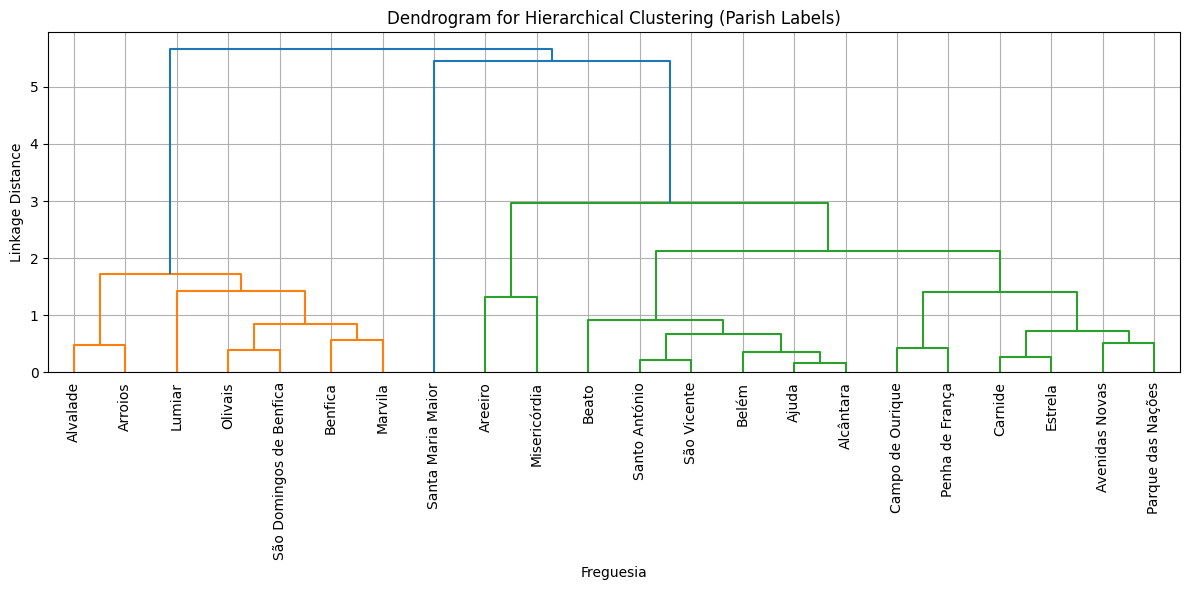

In [99]:
# Get Freguesia names in the same order as coords
# Assuming df_crimes has columns 'Dicofre' and 'Freguesia'
dicofre_list = crime_counts.index  # or divorced_filtered.index
freguesia_names = df_crimes.drop_duplicates('Dicofre').set_index('Dicofre').loc[dicofre_list]['Freguesia'].tolist()

# Run linkage as before
linked = linkage(coords, method='ward')

# Plot dendrogram with parish (Freguesia) labels
plt.figure(figsize=(12, 6))
dendrogram(linked, labels=freguesia_names, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram for Hierarchical Clustering (Parish Labels)")
plt.xlabel("Freguesia")
plt.ylabel("Linkage Distance")
plt.tight_layout()
plt.grid(True)
plt.show()
